**CUSTOMER SEGMENTATION USING PYTHON**

---



First we import the necessary packages and datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ad_data=pd.read_csv("Mall_Customers.csv")

We now display the first five rows of the dataset using the head()

In [ ]:
ad_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Now going into the mathematics of the dataset, let us find out the standard deviation, mean, minimum value and the four quartile percentile of the data.

In [ ]:
ad_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


*Vizualization of Age Distribution*


Using seaborn, a histogram based on the age of different customers is represented  

Text(0.5, 0, 'Age')

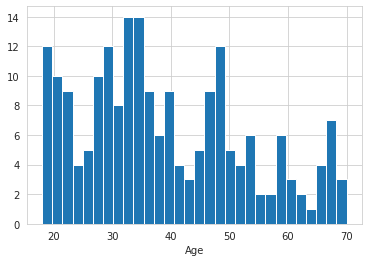

In [ ]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

*Analysis of Customer Annual Income*

Text(0.5, 0, 'Annual Income (k$)')

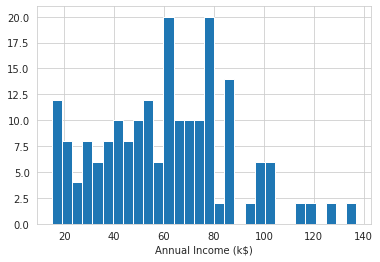

In [ ]:
sns.set_style('whitegrid')
ad_data['Annual Income (k$)'].hist(bins=30)
plt.xlabel('Annual Income (k$)')

*Analysis of Customer Spending Score (1-100)*

Text(0.5, 0, 'Spending Score (1-100)')

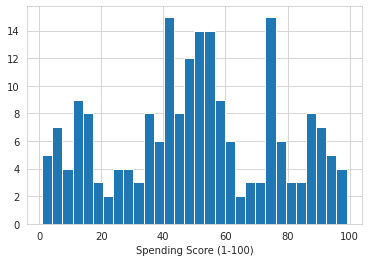

In [ ]:
sns.set_style('whitegrid')
ad_data['Spending Score (1-100)'].hist(bins=30)
plt.xlabel('Spending Score (1-100)')

*Distribution of Age against Annual Income*

Using seaborn, a joint grid based on customer age and their annual income is represented with age along x-axis and annual income in k$ along y-axis

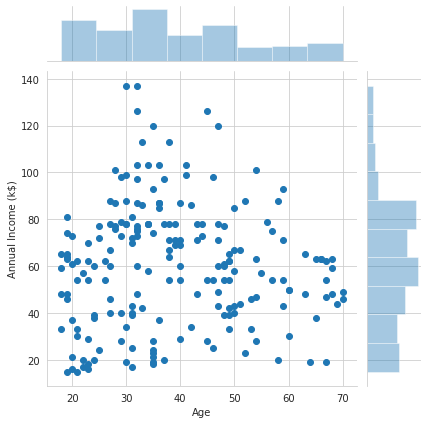

In [ ]:
sns.jointplot(x='Age',y='Annual Income (k$)',data=ad_data)

*Distribution of Age against Spending Score*

A joint plot based on customer age against their spending score is plotted with age along x-axis and spending score from (1-100) along y-axis 

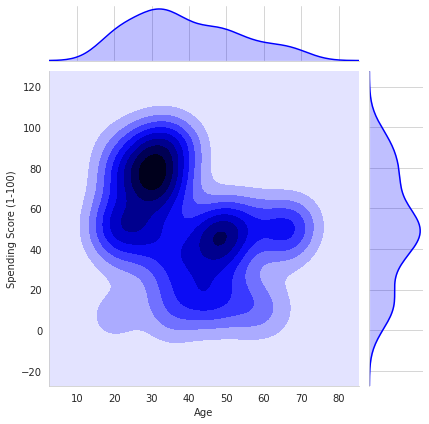

In [ ]:
sns.jointplot(x='Age',y='Spending Score (1-100)',data=ad_data,color='blue',kind='kde')

*Distribution of Annual Income against Spending Score* 

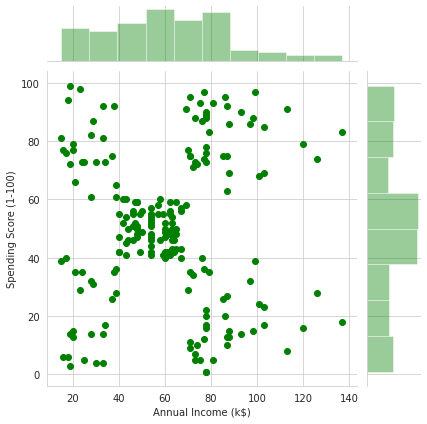

In [ ]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=ad_data,color='green')

*Pair plot of Annual Income of Customers based on CustomerID, Age and Spending Score*

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


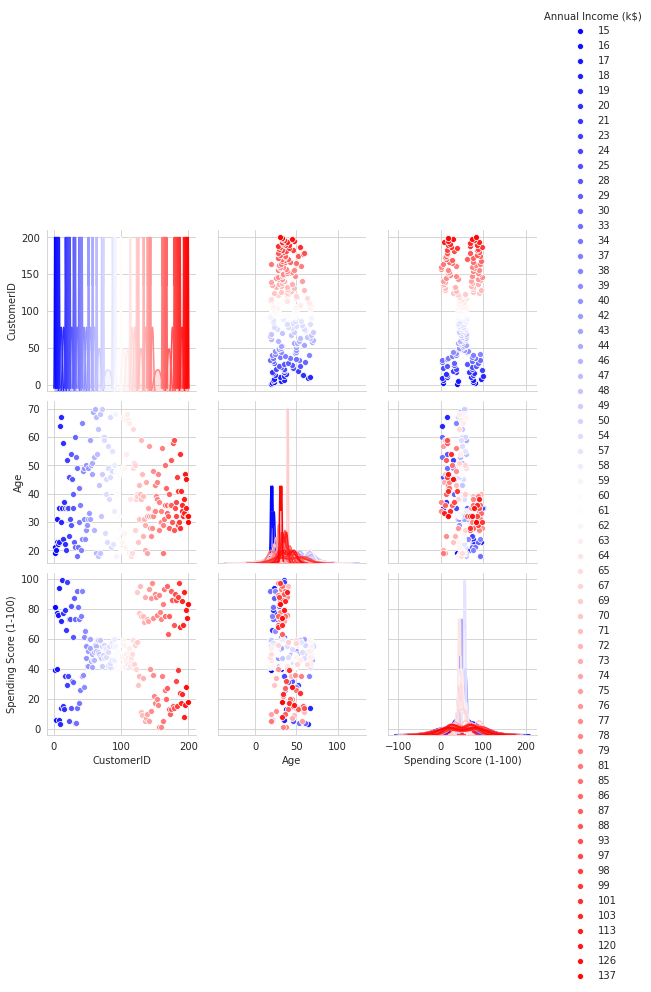

In [ ]:
sns.pairplot(ad_data,hue='Annual Income (k$)',palette='bwr')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=ad_data[['Age','Annual Income (k$)']]
y=ad_data['Spending Score (1-100)']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          35       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
